# **Car Ads Exploratory Data Analysis**

## Importing Necessary Libraries

In [1]:
#necessary imports
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
#mount google drive
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Loading data

In [4]:
#loading the csv data
data = pd.read_csv('/content/gdrive/MyDrive/data (1).csv')
data.head()

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,NaN,None,man,5,7,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71


In [5]:
#no.of rows and columns
print("Number of rows =",data.shape[0])
print("Number of columns =",data.shape[1])

Number of rows = 3552912
Number of columns = 16


In [6]:
#column names
columns = list(data.keys())
print("Columns :", columns)

Columns : ['maker', 'model', 'mileage', 'manufacture_year', 'engine_displacement', 'engine_power', 'body_type', 'color_slug', 'stk_year', 'transmission', 'door_count', 'seat_count', 'fuel_type', 'date_created', 'date_last_seen', 'price_eur']


In [7]:
#column datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552912 entries, 0 to 3552911
Data columns (total 16 columns):
 #   Column               Dtype  
---  ------               -----  
 0   maker                object 
 1   model                object 
 2   mileage              float64
 3   manufacture_year     float64
 4   engine_displacement  float64
 5   engine_power         float64
 6   body_type            object 
 7   color_slug           object 
 8   stk_year             object 
 9   transmission         object 
 10  door_count           object 
 11  seat_count           object 
 12  fuel_type            object 
 13  date_created         object 
 14  date_last_seen       object 
 15  price_eur            float64
dtypes: float64(5), object(11)
memory usage: 433.7+ MB


In [8]:
#statistics for numerical columns
data.describe()

,mileage,manufacture_year,engine_displacement,engine_power,price_eur
count,3.190328e+06,3.182334e+06,2.809498e+06,2.998035e+06,3.552912e+06
mean,1.158140e+05,2.000871e+03,2.043958e+03,9.846796e+01,1.625812e+06
std,3.422508e+05,8.172588e+01,1.973958e+03,4.907309e+01,2.025622e+09
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e-02
25%,1.880000e+04,2.004000e+03,1.400000e+03,6.800000e+01,1.295340e+03
50%,8.641500e+04,2.009000e+03,1.798000e+03,8.600000e+01,7.364910e+03
75%,1.580250e+05,2.013000e+03,1.997000e+03,1.100000e+02,1.628423e+04
max,9.999999e+06,2.017000e+03,3.276700e+04,2.237000e+03,2.706149e+12


## Missing Values Identification and Filtering

In [9]:
#checking null data entries per column
data.isnull().sum()

maker                   518915
model                  1133361
mileage                 362584
manufacture_year        370578
engine_displacement     743414
engine_power            554877
body_type              1122914
color_slug             3343411
stk_year               1708156
transmission            741630
door_count              614373
seat_count              749489
fuel_type              1847606
date_created                 0
date_last_seen               0
price_eur                    0
dtype: int64

In [10]:
#percentage of null data per column
null_percent = (data.isnull().sum())/len(data) * 100
print(null_percent)

maker                  14.605343
model                  31.899495
mileage                10.205263
manufacture_year       10.430261
engine_displacement    20.924076
engine_power           15.617527
body_type              31.605455
color_slug             94.103400
stk_year               48.077633
transmission           20.873863
door_count             17.292097
seat_count             21.095062
fuel_type              52.002583
date_created            0.000000
date_last_seen          0.000000
price_eur               0.000000
dtype: float64


In [11]:
#checking columns with more than 40% missing data
null_percent > 40.0

maker                  False
model                  False
mileage                False
manufacture_year       False
engine_displacement    False
engine_power           False
body_type              False
color_slug              True
stk_year                True
transmission           False
door_count             False
seat_count             False
fuel_type               True
date_created           False
date_last_seen         False
price_eur              False
dtype: bool

In [12]:
#removing columns with more than 40% missing data
data = data.loc[:, null_percent < 40]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552912 entries, 0 to 3552911
Data columns (total 13 columns):
 #   Column               Dtype  
---  ------               -----  
 0   maker                object 
 1   model                object 
 2   mileage              float64
 3   manufacture_year     float64
 4   engine_displacement  float64
 5   engine_power         float64
 6   body_type            object 
 7   transmission         object 
 8   door_count           object 
 9   seat_count           object 
 10  date_created         object 
 11  date_last_seen       object 
 12  price_eur            float64
dtypes: float64(5), object(8)
memory usage: 352.4+ MB


## Unncessary Columns Removal

In [13]:
#removing redundant and unnecessary columns
data = data.drop(['date_created', 'date_last_seen'], axis=1)

In [14]:
data.head()

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,man,5,7,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,man,5,5,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,man,5,5,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,man,5,5,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,man,5,5,2738.71


## Outlier handling

In [15]:
new_data = data.copy()

### Mileage

Text(0.5, 1.0, 'Mileage')

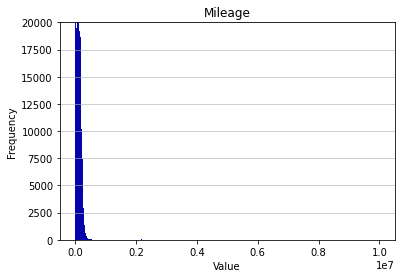

In [16]:
#outlier detection in each numerical feature
#mileage

n, bins, patches = plt.hist(x=new_data['mileage'], bins='auto', color='#0504aa')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.ylim((None, 20000))
plt.title('Mileage')


In [17]:
new_data = new_data.drop(new_data[new_data['mileage']  <= 30].index)

### Door and Seat Count

In [18]:
#door count and seat count
print("Unique door count values:",list(new_data['door_count'].unique()))
print("Unique seat count values:",list(new_data['seat_count'].unique()))

Unique door count values: ['5', '3', '4', 'None', '2', '6', '1', '7', nan, 5.0, 4.0, 3.0, 2.0, 6.0, 1.0, 9.0, 7.0, 8.0, 77.0, 58.0, 54.0, 0.0, 55.0, 22.0, 45.0, 49.0]
Unique seat count values: ['7', '5', '4', 'None', '6', '9', '8', '2', '3', '1', '18', '20', '10', '11', '15', '12', '16', '14', '50', '17', '74', '65', '19', '54', '13', '27', '45', '24', '56', '22', '255', '23', '57', '25', nan, 5.0, 3.0, 4.0, 2.0, 7.0, 8.0, 6.0, 9.0, 23.0, 1.0, 51.0, 12.0, 15.0, 14.0, 55.0, 19.0, 61.0, 21.0, 13.0, 17.0, 20.0, 10.0, 11.0, 18.0, 45.0, 27.0, 53.0, 26.0, 56.0, 58.0, 25.0, 30.0, 36.0, 54.0, 24.0, 16.0, 57.0, 74.0, 50.0, 0.0, 29.0, 52.0, 44.0, 32.0, 512.0, 33.0, 515.0, 59.0, 85.0, 517.0, 81.0, 43.0, 49.0, 138.0]


In [19]:
#replacing strings for door_count and seat_count 
new_data['door_count'].replace('None', np.NaN, inplace=True)
new_data['seat_count'].replace('None', np.NaN, inplace=True)

In [20]:
#door count and seat count
print("Unique door count values:",list(new_data['door_count'].unique()))
print("Unique seat count values:",list(new_data['seat_count'].unique()))

Unique door count values: ['5', '3', '4', nan, '2', '6', '1', '7', 5.0, 4.0, 3.0, 2.0, 6.0, 1.0, 9.0, 7.0, 8.0, 77.0, 58.0, 54.0, 0.0, 55.0, 22.0, 45.0, 49.0]
Unique seat count values: ['7', '5', '4', nan, '6', '9', '8', '2', '3', '1', '18', '20', '10', '11', '15', '12', '16', '14', '50', '17', '74', '65', '19', '54', '13', '27', '45', '24', '56', '22', '255', '23', '57', '25', 5.0, 3.0, 4.0, 2.0, 7.0, 8.0, 6.0, 9.0, 23.0, 1.0, 51.0, 12.0, 15.0, 14.0, 55.0, 19.0, 61.0, 21.0, 13.0, 17.0, 20.0, 10.0, 11.0, 18.0, 45.0, 27.0, 53.0, 26.0, 56.0, 58.0, 25.0, 30.0, 36.0, 54.0, 24.0, 16.0, 57.0, 74.0, 50.0, 0.0, 29.0, 52.0, 44.0, 32.0, 512.0, 33.0, 515.0, 59.0, 85.0, 517.0, 81.0, 43.0, 49.0, 138.0]


In [21]:
#converting string to float
new_data['door_count'] = new_data['door_count'].astype(float)
new_data['seat_count'] = new_data['seat_count'].astype(float)

In [22]:
#door count and seat count
print("Unique door count values:",list(new_data['door_count'].unique()))
print("Unique seat count values:",list(new_data['seat_count'].unique()))

Unique door count values: [5.0, 3.0, 4.0, nan, 2.0, 6.0, 1.0, 7.0, 9.0, 8.0, 77.0, 58.0, 54.0, 0.0, 55.0, 22.0, 45.0, 49.0]
Unique seat count values: [7.0, 5.0, 4.0, nan, 6.0, 9.0, 8.0, 2.0, 3.0, 1.0, 18.0, 20.0, 10.0, 11.0, 15.0, 12.0, 16.0, 14.0, 50.0, 17.0, 74.0, 65.0, 19.0, 54.0, 13.0, 27.0, 45.0, 24.0, 56.0, 22.0, 255.0, 23.0, 57.0, 25.0, 51.0, 55.0, 61.0, 21.0, 53.0, 26.0, 58.0, 30.0, 36.0, 0.0, 29.0, 52.0, 44.0, 32.0, 512.0, 33.0, 515.0, 59.0, 85.0, 517.0, 81.0, 43.0, 49.0, 138.0]


In [23]:
#removing rows with door count>10 and seat_count>25
new_data = new_data.drop(new_data[new_data['door_count']  > 10].index)
new_data = new_data.drop(new_data[new_data['seat_count']  > 25].index)

### Manufacture Year

Text(0.5, 1.0, 'Manufacture_year')

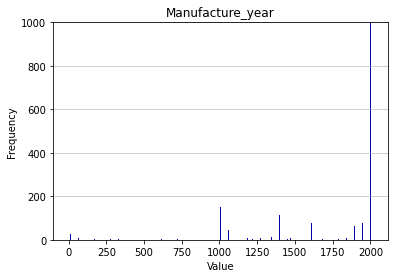

In [24]:
n, bins, patches = plt.hist(x=new_data['manufacture_year'], bins='auto', color='#0504aa')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.ylim((None, 1000))
plt.title('Manufacture_year')

In [25]:
#removing rows with manufacture_year earlier than 1500
new_data = new_data.drop(new_data[new_data['manufacture_year']  < 1500].index)

In [26]:
new_data.shape

(3152323, 11)

In [27]:
new_data['price_eur'].value_counts(bins=25, sort=False)

(-2706149053.025, 108245962122.614]       3152320
(108245962122.614, 216491924245.189]            0
(216491924245.189, 324737886367.763]            1
(324737886367.763, 432983848490.338]            0
(432983848490.338, 541229810612.912]            0
(541229810612.912, 649475772735.486]            0
(649475772735.486, 757721734858.061]            0
(757721734858.061, 865967696980.635]            0
(865967696980.635, 974213659103.21]             0
(974213659103.21, 1082459621225.784]            0
(1082459621225.784, 1190705583348.358]          0
(1190705583348.358, 1298951545470.933]          0
(1298951545470.933, 1407197507593.507]          0
(1407197507593.507, 1515443469716.082]          0
(1515443469716.082, 1623689431838.656]          0
(1623689431838.656, 1731935393961.23]           0
(1731935393961.23, 1840181356083.805]           0
(1840181356083.805, 1948427318206.38]           0
(1948427318206.38, 2056673280328.954]           0
(2056673280328.954, 2164919242451.528]          0


In [28]:
new_data = new_data.drop(new_data[new_data['price_eur']  >= 400000].index)
new_data = new_data.drop(new_data[new_data['price_eur']  <=0].index)

In [29]:
new_data['price_eur'].value_counts(bins=25, sort=False)

(-399.95799999999997, 15999.918]    2480795
(15999.918, 31999.797]               508976
(31999.797, 47999.675]               102779
(47999.675, 63999.554]                27950
(63999.554, 79999.432]                14005
(79999.432, 95999.31]                  5827
(95999.31, 111999.189]                 3282
(111999.189, 127999.067]               1963
(127999.067, 143998.946]               1378
(143998.946, 159998.824]               1047
(159998.824, 175998.702]                617
(175998.702, 191998.581]                665
(191998.581, 207998.459]                443
(207998.459, 223998.338]                331
(223998.338, 239998.216]                273
(239998.216, 255998.094]                195
(255998.094, 271997.973]                136
(271997.973, 287997.851]                141
(287997.851, 303997.73]                 130
(303997.73, 319997.608]                  48
(319997.608, 335997.486]                 70
(335997.486, 351997.365]                 69
(351997.365, 367997.243]        

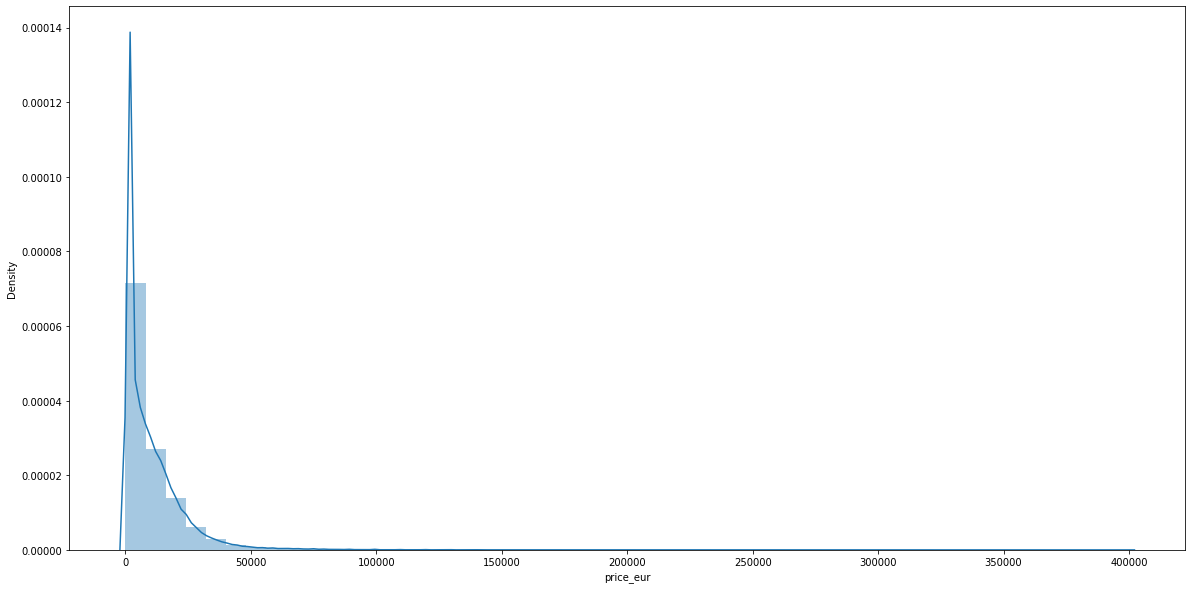

In [30]:
y = new_data['price_eur']

fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.distplot(y)

## Missing value Handling

In [31]:
#replacing NaN with average value for numerical variables
new_data['mileage'].fillna((new_data['mileage'].mean()), inplace=True)
new_data['engine_displacement'].fillna((new_data['engine_displacement'].mean()), inplace=True)
new_data['engine_power'].fillna((new_data['engine_power'].mean()), inplace=True)
new_data['door_count'].fillna((new_data['door_count'].mean()), inplace=True)
new_data['seat_count'].fillna((new_data['seat_count'].mean()), inplace=True)

#replacing NaN with most frequent values in object variables
new_data['manufacture_year'].fillna(new_data['manufacture_year'].value_counts().index[0], inplace=True)
new_data['body_type'].fillna(new_data['body_type'].value_counts().index[0], inplace=True)
new_data['transmission'].fillna(new_data['transmission'].value_counts().index[0], inplace=True)
new_data['model'].fillna(new_data['model'].value_counts().index[0], inplace=True)
new_data['maker'].fillna(new_data['maker'].value_counts().index[0], inplace=True)

In [32]:
new_data.isnull().sum()

maker                  0
model                  0
mileage                0
manufacture_year       0
engine_displacement    0
engine_power           0
body_type              0
transmission           0
door_count             0
seat_count             0
price_eur              0
dtype: int64

## Data Analysis

### Scatter pair plot

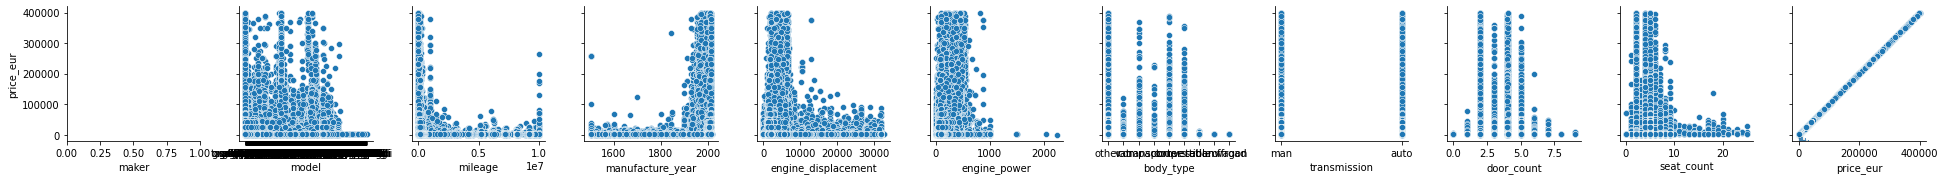

In [33]:
sns.pairplot(new_data, y_vars="price_eur", x_vars=new_data.columns.values)

### Correlation Plot

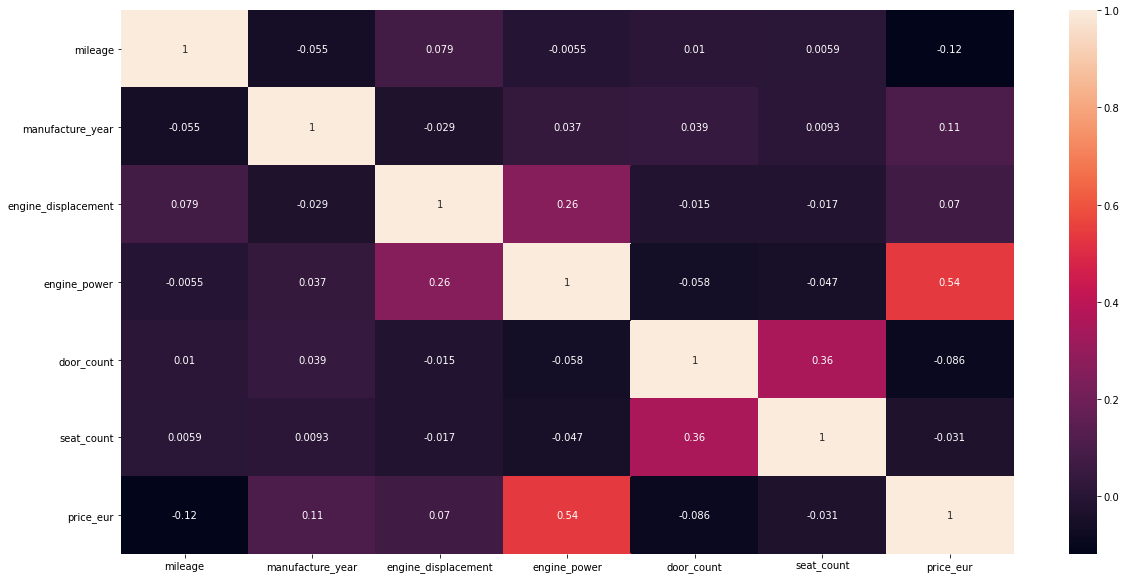

In [34]:
corr = new_data.corr()
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.heatmap(corr, annot=True)